In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
TE = pd.read_csv('TE_PTS_SOS.csv')
# TE.head()
TE


,Week,FantasyPointsPPR,OpponentPositionRank
0,1,23.6,26
1,1,16.9,31
2,1,19.4,20
3,1,16.4,21
4,1,17.7,27
...,...,...,...
394,17,0.5,5
395,17,0.7,14
396,17,0.4,1
397,17,0.7,2


In [3]:
# TE_Wk1 = TE.loc['Week'] == 1

In [3]:
# Assign the data to X and y
# Note: Sklearn requires a two-dimensional array of values
# so we use reshape to create this

X = TE.OpponentPositionRank.values.reshape(-1, 1)
y = TE.FantasyPointsPPR.values.reshape(-1, 1)

print("Shape: ", X.shape, y.shape)
y

Shape:  (399, 1) (399, 1)


array([[23.6],
       [16.9],
       [19.4],
       [16.4],
       [17.7],
       [17.5],
       [10.1],
       [11.2],
       [15. ],
       [12.1],
       [12.2],
       [ 9.7],
       [ 8.3],
       [ 7.9],
       [11. ],
       [ 7.5],
       [ 7.1],
       [ 4.7],
       [ 4.5],
       [ 6.3],
       [ 5.9],
       [ 3.6],
       [ 3. ],
       [ 2.4],
       [24.7],
       [27.3],
       [28.8],
       [24.3],
       [17.9],
       [18.4],
       [16.3],
       [14.4],
       [12.8],
       [10.6],
       [10.4],
       [14.5],
       [ 9.5],
       [12.6],
       [10.3],
       [12.6],
       [ 7.5],
       [ 8.2],
       [ 4.7],
       [ 6.8],
       [ 4.3],
       [ 2.9],
       [ 2.7],
       [ 2.2],
       [ 1.9],
       [ 1.5],
       [ 1.5],
       [ 1.4],
       [ 1.3],
       [ 1.3],
       [ 1.3],
       [ 1.2],
       [27. ],
       [18.3],
       [11.8],
       [15.8],
       [ 9.5],
       [ 9.3],
       [12.5],
       [10.5],
       [11.3],
       [10. ],
       [10

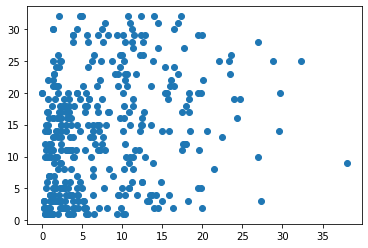

In [4]:
plt.scatter(y, X)

In [5]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()


In [6]:
# Fit the model to the data. 
# Note: This is the training step where you fit the line to the data.

### BEGIN SOLUTION

model.fit(X, y)

### END SOLUTION

LinearRegression()

In [7]:
print('Weight coefficients: ', model.coef_)
print('y-axis intercept: ', model.intercept_)

Weight coefficients:  [[0.21684324]]
y-axis intercept:  [4.34435911]


In [8]:
x_min = np.array([[X.min()]])
x_max = np.array([[X.max()]])
print(f"Min X Value: {x_min}")
print(f"Max X Value: {x_max}")

Min X Value: [[1]]
Max X Value: [[32]]


In [9]:
y_min = model.predict(x_min)
y_max = model.predict(x_max)

Text(0, 0.5, 'Opponent Position Rank')

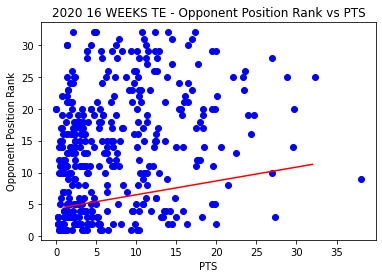

In [13]:
plt.scatter(y, X, c='blue')
plt.plot([x_min[0], x_max[0]], [y_min[0], y_max[0]], c='red')
plt.title('2020 16 WEEKS TE - Opponent Position Rank vs PTS')
plt.xlabel('PTS')
plt.ylabel('Opponent Position Rank')

In [12]:
from sklearn.metrics import mean_squared_error, r2_score

predicted = model.predict(X)

# Score the prediction with mse and r2
mse = mean_squared_error(y, predicted)
r2 = r2_score(y, predicted)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2 ): {r2}")

Mean Squared Error (MSE): 41.79980903596484
R-squared (R2 ): 0.08417919820486364


In [13]:
# Overall Score for the model
model.score(X, y)

0.08417919820486364

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [15]:
model.fit(X_train, y_train)

LinearRegression()

In [16]:
model.score(X_test, y_test)

0.08854177798430685